# Table of contents

- Download latest data
- Retrain model
- Display current squad
- Use model to identify transfers
- Identify playing 11
- Show top performers by position

In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad, get_latest_game_week
from agent import Agent
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import pytorch_lightning as pl


## Download latest data, train model and save model.

In [2]:
model_type = "linear"
features = ["total_points", "ict_index", "clean_sheets", "saves", "assists", "was_home","goals_scored"]
logger = pl.loggers.TensorBoardLogger(f"lightning_logs/model_comparison/{model_type}")
trainer = pl.Trainer(max_epochs=50, gpus=torch.cuda.device_count(), logger=logger,  callbacks=[EarlyStopping(monitor="val_loss")])
gameweek = get_latest_game_week()
agent = Agent(features, epochs=1, window=6, model_type=model_type, gameweek=gameweek, trial_run=True)
await agent.get_data()
await agent.update_model(trainer)

GPU available: True, used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



  | Name  | Type        | Params
--------------------------------------
0 | model | LinearModel | 43    
--------------------------------------
43        Trainable params
0         Non-trainable params
43        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

Validation sanity check:  50%|██████████████████████████████                              | 1/2 [00:00<00:00,  2.41it/s]

/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:322: UserWarning: The number of training samples (15) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Training:   0%|                                                                       | 0/19 [00:00<00:00, 26715.31it/s]

Epoch 0:   0%|                                                                         | 0/19 [00:00<00:00, 1778.00it/s]

Epoch 0:   5%|███▉                                                                       | 1/19 [00:00<00:03,  6.00it/s]

Epoch 0:   5%|██▊                                                   | 1/19 [00:00<00:03,  5.95it/s, loss=2.71, v_num=78]

Epoch 0:  11%|█████▋                                                | 2/19 [00:00<00:01,  8.69it/s, loss=2.73, v_num=78]

Epoch 0:  16%|████████▌                                             | 3/19 [00:00<00:01, 11.36it/s, loss=2.62, v_num=78]

Epoch 0:  21%|███████████▎                                          | 4/19 [00:00<00:01, 13.85it/s, loss=2.57, v_num=78]

Epoch 0:  26%|██████████████▏                                       | 5/19 [00:00<00:00, 16.37it/s, loss=2.54, v_num=78]

Epoch 0:  32%|█████████████████                                     | 6/19 [00:00<00:00, 18.73it/s, loss=2.52, v_num=78]

Epoch 0:  37%|████████████████████▎                                  | 7/19 [00:00<00:00, 20.94it/s, loss=2.5, v_num=78]

Epoch 0:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 23.01it/s, loss=2.48, v_num=78]

Epoch 0:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 25.22it/s, loss=2.46, v_num=78]

Epoch 0:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 27.26it/s, loss=2.44, v_num=78]

Epoch 0:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 29.26it/s, loss=2.41, v_num=78]

Epoch 0:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 31.15it/s, loss=2.39, v_num=78]

Epoch 0:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 33.06it/s, loss=2.36, v_num=78]

Epoch 0:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 34.96it/s, loss=2.35, v_num=78]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 32.82it/s, loss=2.35, v_num=78]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 32.74it/s, loss=2.32, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.93it/s]

Epoch 0: 100%|█████████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.14it/s, loss=2.32, v_num=78]

Epoch 0:   0%|                                                   | 0/19 [00:00<00:00, 31068.92it/s, loss=2.32, v_num=78]

Epoch 1:   0%|                                                    | 0/19 [00:00<00:00, 1064.81it/s, loss=2.32, v_num=78]

Epoch 1:   5%|██▊                                                   | 1/19 [00:00<00:03,  5.48it/s, loss=2.31, v_num=78]

Epoch 1:  11%|█████▊                                                 | 2/19 [00:00<00:02,  8.02it/s, loss=2.3, v_num=78]

Epoch 1:  16%|████████▌                                             | 3/19 [00:00<00:01, 10.43it/s, loss=2.28, v_num=78]

Epoch 1:  21%|███████████▎                                          | 4/19 [00:00<00:01, 12.79it/s, loss=2.26, v_num=78]

Epoch 1:  26%|██████████████▏                                       | 5/19 [00:00<00:00, 15.02it/s, loss=2.25, v_num=78]

Epoch 1:  32%|█████████████████                                     | 6/19 [00:00<00:00, 17.12it/s, loss=2.21, v_num=78]

Epoch 1:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 19.26it/s, loss=2.17, v_num=78]

Epoch 1:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 21.25it/s, loss=2.14, v_num=78]

Epoch 1:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 23.07it/s, loss=2.12, v_num=78]

Epoch 1:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 24.89it/s, loss=2.09, v_num=78]

Epoch 1:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 26.59it/s, loss=2.05, v_num=78]

Epoch 1:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 28.31it/s, loss=2.02, v_num=78]

Epoch 1:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 30.02it/s, loss=1.99, v_num=78]

Epoch 1:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 31.70it/s, loss=1.99, v_num=78]

Epoch 1:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 31.63it/s, loss=1.96, v_num=78]

Epoch 1:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 29.72it/s, loss=1.92, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.02it/s]

Epoch 1: 100%|█████████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.70it/s, loss=1.92, v_num=78]

Epoch 1:   0%|                                                   | 0/19 [00:00<00:00, 41527.76it/s, loss=1.92, v_num=78]

Epoch 2:   0%|                                                    | 0/19 [00:00<00:00, 1753.47it/s, loss=1.92, v_num=78]

Epoch 2:   5%|██▊                                                   | 1/19 [00:00<00:02,  6.41it/s, loss=1.91, v_num=78]

Epoch 2:  11%|█████▋                                                | 2/19 [00:00<00:01,  9.41it/s, loss=1.89, v_num=78]

Epoch 2:  16%|████████▌                                             | 3/19 [00:00<00:01, 12.29it/s, loss=1.87, v_num=78]

Epoch 2:  21%|███████████▎                                          | 4/19 [00:00<00:01, 14.84it/s, loss=1.84, v_num=78]

Epoch 2:  26%|██████████████▏                                       | 5/19 [00:00<00:00, 17.53it/s, loss=1.83, v_num=78]

Epoch 2:  32%|█████████████████▎                                     | 6/19 [00:00<00:00, 20.14it/s, loss=1.8, v_num=78]

Epoch 2:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 22.66it/s, loss=1.77, v_num=78]

Epoch 2:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 24.77it/s, loss=1.75, v_num=78]

Epoch 2:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 27.12it/s, loss=1.73, v_num=78]

Epoch 2:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 29.45it/s, loss=1.71, v_num=78]

Epoch 2:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 31.50it/s, loss=1.68, v_num=78]

Epoch 2:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 33.52it/s, loss=1.66, v_num=78]

Epoch 2:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 35.52it/s, loss=1.64, v_num=78]

Epoch 2:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 37.55it/s, loss=1.64, v_num=78]

Epoch 2:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 37.48it/s, loss=1.62, v_num=78]

Epoch 2:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 34.69it/s, loss=1.59, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.60it/s]

Epoch 2: 100%|█████████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.57it/s, loss=1.59, v_num=78]

Epoch 2:   0%|                                                   | 0/19 [00:00<00:00, 20763.88it/s, loss=1.59, v_num=78]

Epoch 3:   0%|                                                    | 0/19 [00:00<00:00, 1075.19it/s, loss=1.59, v_num=78]

Epoch 3:   5%|██▊                                                   | 1/19 [00:00<00:04,  4.07it/s, loss=1.58, v_num=78]

Epoch 3:  11%|█████▋                                                | 2/19 [00:00<00:02,  5.98it/s, loss=1.57, v_num=78]

Epoch 3:  16%|████████▌                                             | 3/19 [00:00<00:02,  7.86it/s, loss=1.56, v_num=78]

Epoch 3:  21%|███████████▎                                          | 4/19 [00:00<00:01,  9.70it/s, loss=1.54, v_num=78]

Epoch 3:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 11.40it/s, loss=1.53, v_num=78]

Epoch 3:  32%|█████████████████                                     | 6/19 [00:00<00:00, 13.08it/s, loss=1.51, v_num=78]

Epoch 3:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 14.71it/s, loss=1.49, v_num=78]

Epoch 3:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 16.33it/s, loss=1.47, v_num=78]

Epoch 3:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 17.85it/s, loss=1.46, v_num=78]

Epoch 3:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 19.38it/s, loss=1.45, v_num=78]

Epoch 3:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 20.85it/s, loss=1.43, v_num=78]

Epoch 3:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 22.23it/s, loss=1.41, v_num=78]

Epoch 3:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 23.59it/s, loss=1.39, v_num=78]

Epoch 3:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 24.95it/s, loss=1.39, v_num=78]

Epoch 3:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 24.89it/s, loss=1.38, v_num=78]

Epoch 3:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 23.87it/s, loss=1.36, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.59it/s]

Epoch 3: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 17.71it/s, loss=1.36, v_num=78]

Epoch 3:   0%|                                                   | 0/19 [00:00<00:00, 29330.80it/s, loss=1.36, v_num=78]

Epoch 4:   0%|                                                    | 0/19 [00:00<00:00, 1373.38it/s, loss=1.36, v_num=78]

Epoch 4:   5%|██▊                                                   | 1/19 [00:00<00:03,  5.01it/s, loss=1.36, v_num=78]

Epoch 4:  11%|█████▋                                                | 2/19 [00:00<00:02,  7.31it/s, loss=1.35, v_num=78]

Epoch 4:  16%|████████▌                                             | 3/19 [00:00<00:01,  9.49it/s, loss=1.34, v_num=78]

Epoch 4:  21%|███████████▎                                          | 4/19 [00:00<00:01, 11.67it/s, loss=1.33, v_num=78]

Epoch 4:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 13.69it/s, loss=1.32, v_num=78]

Epoch 4:  32%|█████████████████                                     | 6/19 [00:00<00:00, 15.72it/s, loss=1.31, v_num=78]

Epoch 4:  37%|████████████████████▎                                  | 7/19 [00:00<00:00, 17.68it/s, loss=1.3, v_num=78]

Epoch 4:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 19.59it/s, loss=1.28, v_num=78]

Epoch 4:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 21.38it/s, loss=1.27, v_num=78]

Epoch 4:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 23.15it/s, loss=1.27, v_num=78]

Epoch 4:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 24.63it/s, loss=1.25, v_num=78]

Epoch 4:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 26.29it/s, loss=1.24, v_num=78]

Epoch 4:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 27.93it/s, loss=1.23, v_num=78]

Epoch 4:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 29.51it/s, loss=1.23, v_num=78]

Epoch 4:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 29.45it/s, loss=1.22, v_num=78]

Epoch 4:  79%|██████████████████████████████████████████▋           | 15/19 [00:00<00:00, 28.01it/s, loss=1.2, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.96it/s]

Epoch 4: 100%|██████████████████████████████████████████████████████| 19/19 [00:01<00:00, 17.23it/s, loss=1.2, v_num=78]

Epoch 4:   0%|                                                    | 0/19 [00:00<00:00, 29746.84it/s, loss=1.2, v_num=78]

Epoch 5:   0%|                                                      | 0/19 [00:00<00:00, 674.76it/s, loss=1.2, v_num=78]

Epoch 5:   5%|██▊                                                   | 1/19 [00:00<00:03,  5.64it/s, loss=1.21, v_num=78]

Epoch 5:  11%|█████▊                                                 | 2/19 [00:00<00:02,  8.31it/s, loss=1.2, v_num=78]

Epoch 5:  16%|████████▋                                              | 3/19 [00:00<00:01, 10.90it/s, loss=1.2, v_num=78]

Epoch 5:  21%|███████████▎                                          | 4/19 [00:00<00:01, 13.42it/s, loss=1.19, v_num=78]

Epoch 5:  26%|██████████████▏                                       | 5/19 [00:00<00:00, 15.73it/s, loss=1.19, v_num=78]

Epoch 5:  32%|█████████████████                                     | 6/19 [00:00<00:00, 18.07it/s, loss=1.18, v_num=78]

Epoch 5:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 20.35it/s, loss=1.17, v_num=78]

Epoch 5:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 22.52it/s, loss=1.16, v_num=78]

Epoch 5:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 24.62it/s, loss=1.15, v_num=78]

Epoch 5:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 26.67it/s, loss=1.15, v_num=78]

Epoch 5:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 28.68it/s, loss=1.14, v_num=78]

Epoch 5:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 30.64it/s, loss=1.13, v_num=78]

Epoch 5:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 32.50it/s, loss=1.12, v_num=78]

Epoch 5:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 34.45it/s, loss=1.12, v_num=78]

Epoch 5:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 34.39it/s, loss=1.11, v_num=78]

Epoch 5:  79%|██████████████████████████████████████████▋           | 15/19 [00:00<00:00, 32.65it/s, loss=1.1, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.94it/s]

Epoch 5: 100%|██████████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.14it/s, loss=1.1, v_num=78]

Epoch 5:   0%|                                                    | 0/19 [00:00<00:00, 13981.01it/s, loss=1.1, v_num=78]

Epoch 6:   0%|                                                     | 0/19 [00:00<00:00, 1316.07it/s, loss=1.1, v_num=78]

Epoch 6:   5%|██▉                                                    | 1/19 [00:00<00:03,  5.96it/s, loss=1.1, v_num=78]

Epoch 6:  11%|█████▊                                                 | 2/19 [00:00<00:01,  8.73it/s, loss=1.1, v_num=78]

Epoch 6:  16%|████████▋                                              | 3/19 [00:00<00:01, 11.30it/s, loss=1.1, v_num=78]

Epoch 6:  21%|███████████▎                                          | 4/19 [00:00<00:01, 13.90it/s, loss=1.09, v_num=78]

Epoch 6:  26%|██████████████▏                                       | 5/19 [00:00<00:00, 16.44it/s, loss=1.09, v_num=78]

Epoch 6:  32%|█████████████████                                     | 6/19 [00:00<00:00, 18.76it/s, loss=1.08, v_num=78]

Epoch 6:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 21.13it/s, loss=1.08, v_num=78]

Epoch 6:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 22.99it/s, loss=1.07, v_num=78]

Epoch 6:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 25.20it/s, loss=1.07, v_num=78]

Epoch 6:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 27.16it/s, loss=1.07, v_num=78]

Epoch 6:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 29.07it/s, loss=1.05, v_num=78]

Epoch 6:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 30.86it/s, loss=1.05, v_num=78]

Epoch 6:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 32.58it/s, loss=1.04, v_num=78]

Epoch 6:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 34.14it/s, loss=1.04, v_num=78]

Epoch 6:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 34.05it/s, loss=1.04, v_num=78]

Epoch 6:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 31.17it/s, loss=1.03, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.83it/s]

Epoch 6: 100%|█████████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.99it/s, loss=1.03, v_num=78]

Epoch 6:   0%|                                                   | 0/19 [00:00<00:00, 26886.56it/s, loss=1.03, v_num=78]

Epoch 7:   0%|                                                    | 0/19 [00:00<00:00, 1259.55it/s, loss=1.03, v_num=78]

Epoch 7:   5%|██▊                                                   | 1/19 [00:00<00:05,  3.15it/s, loss=1.03, v_num=78]

Epoch 7:  11%|█████▋                                                | 2/19 [00:00<00:03,  4.60it/s, loss=1.03, v_num=78]

Epoch 7:  16%|████████▌                                             | 3/19 [00:00<00:02,  5.91it/s, loss=1.03, v_num=78]

Epoch 7:  21%|███████████▎                                          | 4/19 [00:00<00:02,  7.24it/s, loss=1.03, v_num=78]

Epoch 7:  26%|██████████████▏                                       | 5/19 [00:00<00:01,  8.52it/s, loss=1.02, v_num=78]

Epoch 7:  32%|█████████████████                                     | 6/19 [00:00<00:01,  9.83it/s, loss=1.02, v_num=78]

Epoch 7:  37%|███████████████████▉                                  | 7/19 [00:00<00:01, 11.14it/s, loss=1.01, v_num=78]

Epoch 7:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 12.43it/s, loss=1.01, v_num=78]

Epoch 7:  47%|███████████████████████████                              | 9/19 [00:00<00:00, 13.65it/s, loss=1, v_num=78]

Epoch 7:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 14.90it/s, loss=1.01, v_num=78]

Epoch 7:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 16.06it/s, loss=0.994, v_num=78]

Epoch 7:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 17.24it/s, loss=0.988, v_num=78]

Epoch 7:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 18.41it/s, loss=0.984, v_num=78]

Epoch 7:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 19.57it/s, loss=0.984, v_num=78]

Epoch 7:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 19.54it/s, loss=0.981, v_num=78]

Epoch 7:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 19.23it/s, loss=0.971, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.19it/s]

Epoch 7: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.65it/s, loss=0.971, v_num=78]

Epoch 7:   0%|                                                  | 0/19 [00:00<00:00, 29330.80it/s, loss=0.971, v_num=78]

Epoch 8:   0%|                                                   | 0/19 [00:00<00:00, 1028.02it/s, loss=0.971, v_num=78]

Epoch 8:   5%|██▊                                                  | 1/19 [00:00<00:06,  3.00it/s, loss=0.977, v_num=78]

Epoch 8:  11%|█████▌                                               | 2/19 [00:00<00:04,  4.08it/s, loss=0.977, v_num=78]

Epoch 8:  16%|████████▎                                            | 3/19 [00:00<00:02,  5.37it/s, loss=0.976, v_num=78]

Epoch 8:  21%|███████████▏                                         | 4/19 [00:00<00:02,  6.60it/s, loss=0.975, v_num=78]

Epoch 8:  26%|█████████████▉                                       | 5/19 [00:00<00:01,  7.79it/s, loss=0.973, v_num=78]

Epoch 8:  32%|████████████████▋                                    | 6/19 [00:00<00:01,  9.01it/s, loss=0.969, v_num=78]

Epoch 8:  37%|███████████████████▌                                 | 7/19 [00:00<00:01, 10.17it/s, loss=0.965, v_num=78]

Epoch 8:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 11.30it/s, loss=0.961, v_num=78]

Epoch 8:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 12.45it/s, loss=0.957, v_num=78]

Epoch 8:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 13.53it/s, loss=0.96, v_num=78]

Epoch 8:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 14.63it/s, loss=0.949, v_num=78]

Epoch 8:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 13.77it/s, loss=0.943, v_num=78]

Epoch 8:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 14.69it/s, loss=0.941, v_num=78]

Epoch 8:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 15.59it/s, loss=0.941, v_num=78]

Epoch 8:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 15.57it/s, loss=0.938, v_num=78]

Epoch 8:  79%|█████████████████████████████████████████           | 15/19 [00:01<00:00, 15.43it/s, loss=0.929, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.74it/s]

Epoch 8: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.47it/s, loss=0.929, v_num=78]

Epoch 8:   0%|                                                  | 0/19 [00:00<00:00, 29127.11it/s, loss=0.929, v_num=78]

Epoch 9:   0%|                                                   | 0/19 [00:00<00:00, 1302.58it/s, loss=0.929, v_num=78]

Epoch 9:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.76it/s, loss=0.936, v_num=78]

Epoch 9:  11%|█████▌                                               | 2/19 [00:00<00:02,  8.38it/s, loss=0.936, v_num=78]

Epoch 9:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.91it/s, loss=0.936, v_num=78]

Epoch 9:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.30it/s, loss=0.936, v_num=78]

Epoch 9:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.74it/s, loss=0.934, v_num=78]

Epoch 9:  32%|████████████████▋                                    | 6/19 [00:00<00:00, 17.96it/s, loss=0.931, v_num=78]

Epoch 9:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 20.17it/s, loss=0.928, v_num=78]

Epoch 9:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 22.32it/s, loss=0.925, v_num=78]

Epoch 9:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 24.37it/s, loss=0.921, v_num=78]

Epoch 9:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 26.25it/s, loss=0.925, v_num=78]

Epoch 9:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 28.18it/s, loss=0.914, v_num=78]

Epoch 9:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 30.04it/s, loss=0.909, v_num=78]

Epoch 9:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 31.91it/s, loss=0.907, v_num=78]

Epoch 9:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 33.75it/s, loss=0.907, v_num=78]

Epoch 9:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 33.69it/s, loss=0.905, v_num=78]

Epoch 9:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 31.83it/s, loss=0.896, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.72it/s]

Epoch 9: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.97it/s, loss=0.896, v_num=78]

Epoch 9:   0%|                                                  | 0/19 [00:00<00:00, 25266.89it/s, loss=0.896, v_num=78]

Epoch 10:   0%|                                                  | 0/19 [00:00<00:00, 1174.88it/s, loss=0.896, v_num=78]

Epoch 10:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.47it/s, loss=0.904, v_num=78]

Epoch 10:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.99it/s, loss=0.904, v_num=78]

Epoch 10:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.38it/s, loss=0.904, v_num=78]

Epoch 10:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.71it/s, loss=0.905, v_num=78]

Epoch 10:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.93it/s, loss=0.904, v_num=78]

Epoch 10:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.09it/s, loss=0.901, v_num=78]

Epoch 10:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.16it/s, loss=0.899, v_num=78]

Epoch 10:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.18it/s, loss=0.896, v_num=78]

Epoch 10:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.95it/s, loss=0.893, v_num=78]

Epoch 10:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.89it/s, loss=0.897, v_num=78]

Epoch 10:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.60it/s, loss=0.887, v_num=78]

Epoch 10:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.40it/s, loss=0.882, v_num=78]

Epoch 10:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.05it/s, loss=0.881, v_num=78]

Epoch 10:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.78it/s, loss=0.881, v_num=78]

Epoch 10:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.71it/s, loss=0.878, v_num=78]

Epoch 10:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 29.80it/s, loss=0.87, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.83it/s]

Epoch 10: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.69it/s, loss=0.87, v_num=78]

Epoch 10:   0%|                                                  | 0/19 [00:00<00:00, 33554.43it/s, loss=0.87, v_num=78]

Epoch 11:   0%|                                                   | 0/19 [00:00<00:00, 1461.94it/s, loss=0.87, v_num=78]

Epoch 11:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.36it/s, loss=0.878, v_num=78]

Epoch 11:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.72it/s, loss=0.879, v_num=78]

Epoch 11:  16%|████████▏                                           | 3/19 [00:00<00:01,  9.82it/s, loss=0.879, v_num=78]

Epoch 11:  21%|██████████▉                                         | 4/19 [00:00<00:01, 11.61it/s, loss=0.881, v_num=78]

Epoch 11:  26%|█████████████▉                                       | 5/19 [00:00<00:01, 13.39it/s, loss=0.88, v_num=78]

Epoch 11:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 15.00it/s, loss=0.877, v_num=78]

Epoch 11:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 16.73it/s, loss=0.877, v_num=78]

Epoch 11:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 18.33it/s, loss=0.874, v_num=78]

Epoch 11:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 20.04it/s, loss=0.871, v_num=78]

Epoch 11:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 21.73it/s, loss=0.875, v_num=78]

Epoch 11:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 23.31it/s, loss=0.865, v_num=78]

Epoch 11:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 24.77it/s, loss=0.861, v_num=78]

Epoch 11:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 26.30it/s, loss=0.86, v_num=78]

Epoch 11:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 27.84it/s, loss=0.86, v_num=78]

Epoch 11:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 27.79it/s, loss=0.857, v_num=78]

Epoch 11:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 26.50it/s, loss=0.85, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.48it/s]

Epoch 11: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 18.31it/s, loss=0.85, v_num=78]

Epoch 11:   0%|                                                  | 0/19 [00:00<00:00, 25420.02it/s, loss=0.85, v_num=78]

Epoch 12:   0%|                                                    | 0/19 [00:00<00:00, 897.56it/s, loss=0.85, v_num=78]

Epoch 12:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.78it/s, loss=0.858, v_num=78]

Epoch 12:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.46it/s, loss=0.859, v_num=78]

Epoch 12:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.00it/s, loss=0.859, v_num=78]

Epoch 12:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.50it/s, loss=0.861, v_num=78]

Epoch 12:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.86it/s, loss=0.86, v_num=78]

Epoch 12:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.24it/s, loss=0.858, v_num=78]

Epoch 12:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.42it/s, loss=0.858, v_num=78]

Epoch 12:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.55it/s, loss=0.856, v_num=78]

Epoch 12:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.59it/s, loss=0.853, v_num=78]

Epoch 12:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.59it/s, loss=0.857, v_num=78]

Epoch 12:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.44it/s, loss=0.848, v_num=78]

Epoch 12:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.28it/s, loss=0.844, v_num=78]

Epoch 12:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.14it/s, loss=0.843, v_num=78]

Epoch 12:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.00it/s, loss=0.843, v_num=78]

Epoch 12:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.93it/s, loss=0.841, v_num=78]

Epoch 12:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.09it/s, loss=0.834, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.07it/s]

Epoch 12: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.14it/s, loss=0.834, v_num=78]

Epoch 12:   0%|                                                 | 0/19 [00:00<00:00, 30393.51it/s, loss=0.834, v_num=78]

Epoch 13:   0%|                                                  | 0/19 [00:00<00:00, 1059.17it/s, loss=0.834, v_num=78]

Epoch 13:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.28it/s, loss=0.842, v_num=78]

Epoch 13:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.74it/s, loss=0.842, v_num=78]

Epoch 13:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.12it/s, loss=0.842, v_num=78]

Epoch 13:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.40it/s, loss=0.845, v_num=78]

Epoch 13:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.59it/s, loss=0.845, v_num=78]

Epoch 13:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.60it/s, loss=0.843, v_num=78]

Epoch 13:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.68it/s, loss=0.844, v_num=78]

Epoch 13:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.56it/s, loss=0.842, v_num=78]

Epoch 13:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.55it/s, loss=0.839, v_num=78]

Epoch 13:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.38it/s, loss=0.843, v_num=78]

Epoch 13:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.21it/s, loss=0.834, v_num=78]

Epoch 13:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 28.08it/s, loss=0.83, v_num=78]

Epoch 13:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.74it/s, loss=0.829, v_num=78]

Epoch 13:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.44it/s, loss=0.829, v_num=78]

Epoch 13:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.36it/s, loss=0.827, v_num=78]

Epoch 13:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.86it/s, loss=0.821, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.78it/s]

Epoch 13: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.63it/s, loss=0.821, v_num=78]

Epoch 13:   0%|                                                 | 0/19 [00:00<00:00, 11037.64it/s, loss=0.821, v_num=78]

Epoch 14:   0%|                                                   | 0/19 [00:00<00:00, 823.87it/s, loss=0.821, v_num=78]

Epoch 14:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.47it/s, loss=0.829, v_num=78]

Epoch 14:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.05it/s, loss=0.829, v_num=78]

Epoch 14:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.52it/s, loss=0.829, v_num=78]

Epoch 14:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.87it/s, loss=0.833, v_num=78]

Epoch 14:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.03it/s, loss=0.833, v_num=78]

Epoch 14:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.19it/s, loss=0.831, v_num=78]

Epoch 14:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.29it/s, loss=0.832, v_num=78]

Epoch 14:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.17it/s, loss=0.831, v_num=78]

Epoch 14:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.00it/s, loss=0.827, v_num=78]

Epoch 14:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.94it/s, loss=0.832, v_num=78]

Epoch 14:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.84it/s, loss=0.823, v_num=78]

Epoch 14:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.62it/s, loss=0.819, v_num=78]

Epoch 14:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.34it/s, loss=0.818, v_num=78]

Epoch 14:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.12it/s, loss=0.818, v_num=78]

Epoch 14:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.02it/s, loss=0.816, v_num=78]

Epoch 14:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 30.40it/s, loss=0.81, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.70it/s]

Epoch 14: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.51it/s, loss=0.81, v_num=78]

Epoch 14:   0%|                                                  | 0/19 [00:00<00:00, 26715.31it/s, loss=0.81, v_num=78]

Epoch 15:   0%|                                                   | 0/19 [00:00<00:00, 1316.07it/s, loss=0.81, v_num=78]

Epoch 15:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.63it/s, loss=0.818, v_num=78]

Epoch 15:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.21it/s, loss=0.819, v_num=78]

Epoch 15:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.70it/s, loss=0.819, v_num=78]

Epoch 15:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.12it/s, loss=0.823, v_num=78]

Epoch 15:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.52it/s, loss=0.823, v_num=78]

Epoch 15:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.71it/s, loss=0.822, v_num=78]

Epoch 15:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.90it/s, loss=0.823, v_num=78]

Epoch 15:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.81it/s, loss=0.822, v_num=78]

Epoch 15:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.95it/s, loss=0.818, v_num=78]

Epoch 15:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.99it/s, loss=0.822, v_num=78]

Epoch 15:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.01it/s, loss=0.814, v_num=78]

Epoch 15:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 30.01it/s, loss=0.81, v_num=78]

Epoch 15:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 31.93it/s, loss=0.81, v_num=78]

Epoch 15:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 33.85it/s, loss=0.81, v_num=78]

Epoch 15:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.79it/s, loss=0.808, v_num=78]

Epoch 15:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.24it/s, loss=0.802, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.06it/s]

Epoch 15: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.28it/s, loss=0.802, v_num=78]

Epoch 15:   0%|                                                 | 0/19 [00:00<00:00, 28926.23it/s, loss=0.802, v_num=78]

Epoch 16:   0%|                                                  | 0/19 [00:00<00:00, 1514.74it/s, loss=0.802, v_num=78]

Epoch 16:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.90it/s, loss=0.81, v_num=78]

Epoch 16:  11%|█████▌                                               | 2/19 [00:00<00:01,  8.63it/s, loss=0.81, v_num=78]

Epoch 16:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.23it/s, loss=0.81, v_num=78]

Epoch 16:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.80it/s, loss=0.815, v_num=78]

Epoch 16:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.29it/s, loss=0.815, v_num=78]

Epoch 16:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.66it/s, loss=0.814, v_num=78]

Epoch 16:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.92it/s, loss=0.815, v_num=78]

Epoch 16:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.00it/s, loss=0.814, v_num=78]

Epoch 16:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.01it/s, loss=0.811, v_num=78]

Epoch 16:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.15it/s, loss=0.815, v_num=78]

Epoch 16:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.12it/s, loss=0.806, v_num=78]

Epoch 16:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.10it/s, loss=0.803, v_num=78]

Epoch 16:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.10it/s, loss=0.803, v_num=78]

Epoch 16:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.07it/s, loss=0.803, v_num=78]

Epoch 16:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.99it/s, loss=0.801, v_num=78]

Epoch 16:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.92it/s, loss=0.795, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  3.00it/s]

Epoch 16: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.15it/s, loss=0.795, v_num=78]

Epoch 16:   0%|                                                 | 0/19 [00:00<00:00, 30393.51it/s, loss=0.795, v_num=78]

Epoch 17:   0%|                                                  | 0/19 [00:00<00:00, 1259.93it/s, loss=0.795, v_num=78]

Epoch 17:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.72it/s, loss=0.803, v_num=78]

Epoch 17:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.38it/s, loss=0.803, v_num=78]

Epoch 17:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.95it/s, loss=0.803, v_num=78]

Epoch 17:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.46it/s, loss=0.808, v_num=78]

Epoch 17:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.86it/s, loss=0.808, v_num=78]

Epoch 17:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.05it/s, loss=0.808, v_num=78]

Epoch 17:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.26it/s, loss=0.809, v_num=78]

Epoch 17:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.36it/s, loss=0.808, v_num=78]

Epoch 17:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.46it/s, loss=0.805, v_num=78]

Epoch 17:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.54it/s, loss=0.809, v_num=78]

Epoch 17:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 28.51it/s, loss=0.8, v_num=78]

Epoch 17:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.44it/s, loss=0.797, v_num=78]

Epoch 17:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.28it/s, loss=0.797, v_num=78]

Epoch 17:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.18it/s, loss=0.797, v_num=78]

Epoch 17:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.12it/s, loss=0.795, v_num=78]

Epoch 17:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.52it/s, loss=0.789, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.10it/s]

Epoch 17: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.49it/s, loss=0.789, v_num=78]

Epoch 17:   0%|                                                 | 0/19 [00:00<00:00, 33288.13it/s, loss=0.789, v_num=78]

Epoch 18:   0%|                                                  | 0/19 [00:00<00:00, 1396.70it/s, loss=0.789, v_num=78]

Epoch 18:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.76it/s, loss=0.798, v_num=78]

Epoch 18:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.44it/s, loss=0.798, v_num=78]

Epoch 18:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.01it/s, loss=0.798, v_num=78]

Epoch 18:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.55it/s, loss=0.803, v_num=78]

Epoch 18:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.92it/s, loss=0.803, v_num=78]

Epoch 18:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.27it/s, loss=0.802, v_num=78]

Epoch 18:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.47it/s, loss=0.804, v_num=78]

Epoch 18:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.73it/s, loss=0.804, v_num=78]

Epoch 18:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 24.87it/s, loss=0.8, v_num=78]

Epoch 18:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.88it/s, loss=0.804, v_num=78]

Epoch 18:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.98it/s, loss=0.796, v_num=78]

Epoch 18:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.88it/s, loss=0.793, v_num=78]

Epoch 18:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.83it/s, loss=0.792, v_num=78]

Epoch 18:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.78it/s, loss=0.792, v_num=78]

Epoch 18:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.72it/s, loss=0.791, v_num=78]

Epoch 18:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.93it/s, loss=0.785, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.12it/s]

Epoch 18: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.76it/s, loss=0.785, v_num=78]

Epoch 18:   0%|                                                 | 0/19 [00:00<00:00, 31536.12it/s, loss=0.785, v_num=78]

Epoch 19:   0%|                                                  | 0/19 [00:00<00:00, 1197.69it/s, loss=0.785, v_num=78]

Epoch 19:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.21it/s, loss=0.793, v_num=78]

Epoch 19:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.64it/s, loss=0.793, v_num=78]

Epoch 19:  16%|████████▏                                           | 3/19 [00:00<00:01,  9.96it/s, loss=0.793, v_num=78]

Epoch 19:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.28it/s, loss=0.798, v_num=78]

Epoch 19:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.46it/s, loss=0.799, v_num=78]

Epoch 19:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.55it/s, loss=0.798, v_num=78]

Epoch 19:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 18.64it/s, loss=0.8, v_num=78]

Epoch 19:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 20.67it/s, loss=0.8, v_num=78]

Epoch 19:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.54it/s, loss=0.796, v_num=78]

Epoch 19:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 24.41it/s, loss=0.8, v_num=78]

Epoch 19:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.27it/s, loss=0.792, v_num=78]

Epoch 19:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.07it/s, loss=0.789, v_num=78]

Epoch 19:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.89it/s, loss=0.789, v_num=78]

Epoch 19:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.61it/s, loss=0.789, v_num=78]

Epoch 19:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.54it/s, loss=0.787, v_num=78]

Epoch 19:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.15it/s, loss=0.781, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.90it/s]

Epoch 19: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.02it/s, loss=0.781, v_num=78]

Epoch 19:   0%|                                                 | 0/19 [00:00<00:00, 29959.31it/s, loss=0.781, v_num=78]

Epoch 20:   0%|                                                  | 0/19 [00:00<00:00, 1027.76it/s, loss=0.781, v_num=78]

Epoch 20:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.55it/s, loss=0.789, v_num=78]

Epoch 20:  11%|█████▌                                               | 2/19 [00:00<00:02,  8.12it/s, loss=0.79, v_num=78]

Epoch 20:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.44it/s, loss=0.79, v_num=78]

Epoch 20:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.61it/s, loss=0.795, v_num=78]

Epoch 20:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.67it/s, loss=0.795, v_num=78]

Epoch 20:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.80it/s, loss=0.795, v_num=78]

Epoch 20:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.88it/s, loss=0.797, v_num=78]

Epoch 20:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.73it/s, loss=0.797, v_num=78]

Epoch 20:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.41it/s, loss=0.793, v_num=78]

Epoch 20:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.18it/s, loss=0.797, v_num=78]

Epoch 20:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 25.90it/s, loss=0.789, v_num=78]

Epoch 20:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.55it/s, loss=0.786, v_num=78]

Epoch 20:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.25it/s, loss=0.786, v_num=78]

Epoch 20:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.02it/s, loss=0.786, v_num=78]

Epoch 20:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.94it/s, loss=0.784, v_num=78]

Epoch 20:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.25it/s, loss=0.778, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.90it/s]

Epoch 20: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.66it/s, loss=0.778, v_num=78]

Epoch 20:   0%|                                                 | 0/19 [00:00<00:00, 32017.59it/s, loss=0.778, v_num=78]

Epoch 21:   0%|                                                  | 0/19 [00:00<00:00, 1189.54it/s, loss=0.778, v_num=78]

Epoch 21:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.76it/s, loss=0.786, v_num=78]

Epoch 21:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.44it/s, loss=0.787, v_num=78]

Epoch 21:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.05it/s, loss=0.787, v_num=78]

Epoch 21:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.55it/s, loss=0.792, v_num=78]

Epoch 21:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.92it/s, loss=0.793, v_num=78]

Epoch 21:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.09it/s, loss=0.792, v_num=78]

Epoch 21:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.16it/s, loss=0.794, v_num=78]

Epoch 21:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.35it/s, loss=0.794, v_num=78]

Epoch 21:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 24.42it/s, loss=0.79, v_num=78]

Epoch 21:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.35it/s, loss=0.794, v_num=78]

Epoch 21:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.23it/s, loss=0.786, v_num=78]

Epoch 21:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.03it/s, loss=0.783, v_num=78]

Epoch 21:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.81it/s, loss=0.783, v_num=78]

Epoch 21:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.60it/s, loss=0.783, v_num=78]

Epoch 21:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.54it/s, loss=0.781, v_num=78]

Epoch 21:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.75it/s, loss=0.776, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.04it/s]

Epoch 21: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.04it/s, loss=0.776, v_num=78]

Epoch 21:   0%|                                                 | 0/19 [00:00<00:00, 29959.31it/s, loss=0.776, v_num=78]

Epoch 22:   0%|                                                  | 0/19 [00:00<00:00, 1385.17it/s, loss=0.776, v_num=78]

Epoch 22:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.52it/s, loss=0.784, v_num=78]

Epoch 22:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.08it/s, loss=0.784, v_num=78]

Epoch 22:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.55it/s, loss=0.784, v_num=78]

Epoch 22:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.89it/s, loss=0.789, v_num=78]

Epoch 22:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 15.05it/s, loss=0.79, v_num=78]

Epoch 22:  32%|████████████████▋                                    | 6/19 [00:00<00:00, 17.31it/s, loss=0.79, v_num=78]

Epoch 22:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.36it/s, loss=0.792, v_num=78]

Epoch 22:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.36it/s, loss=0.792, v_num=78]

Epoch 22:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.33it/s, loss=0.788, v_num=78]

Epoch 22:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.17it/s, loss=0.792, v_num=78]

Epoch 22:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.00it/s, loss=0.784, v_num=78]

Epoch 22:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.74it/s, loss=0.781, v_num=78]

Epoch 22:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.39it/s, loss=0.781, v_num=78]

Epoch 22:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.16it/s, loss=0.781, v_num=78]

Epoch 22:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.06it/s, loss=0.779, v_num=78]

Epoch 22:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.41it/s, loss=0.774, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.05it/s]

Epoch 22: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.52it/s, loss=0.774, v_num=78]

Epoch 22:   0%|                                                 | 0/19 [00:00<00:00, 32017.59it/s, loss=0.774, v_num=78]

Epoch 23:   0%|                                                  | 0/19 [00:00<00:00, 1518.57it/s, loss=0.774, v_num=78]

Epoch 23:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.83it/s, loss=0.782, v_num=78]

Epoch 23:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.54it/s, loss=0.782, v_num=78]

Epoch 23:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.14it/s, loss=0.782, v_num=78]

Epoch 23:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.65it/s, loss=0.787, v_num=78]

Epoch 23:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.09it/s, loss=0.788, v_num=78]

Epoch 23:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.37it/s, loss=0.788, v_num=78]

Epoch 23:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 20.60it/s, loss=0.79, v_num=78]

Epoch 23:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 22.81it/s, loss=0.79, v_num=78]

Epoch 23:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.94it/s, loss=0.786, v_num=78]

Epoch 23:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 26.92it/s, loss=0.79, v_num=78]

Epoch 23:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.01it/s, loss=0.782, v_num=78]

Epoch 23:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.94it/s, loss=0.779, v_num=78]

Epoch 23:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.55it/s, loss=0.779, v_num=78]

Epoch 23:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.42it/s, loss=0.779, v_num=78]

Epoch 23:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.37it/s, loss=0.777, v_num=78]

Epoch 23:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.83it/s, loss=0.772, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.98it/s]

Epoch 23: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.84it/s, loss=0.772, v_num=78]

Epoch 23:   0%|                                                 | 0/19 [00:00<00:00, 28728.11it/s, loss=0.772, v_num=78]

Epoch 24:   0%|                                                  | 0/19 [00:00<00:00, 1272.54it/s, loss=0.772, v_num=78]

Epoch 24:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.88it/s, loss=0.78, v_num=78]

Epoch 24:  11%|█████▌                                               | 2/19 [00:00<00:01,  8.54it/s, loss=0.78, v_num=78]

Epoch 24:  16%|████████▎                                            | 3/19 [00:00<00:01, 11.22it/s, loss=0.78, v_num=78]

Epoch 24:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.80it/s, loss=0.785, v_num=78]

Epoch 24:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.31it/s, loss=0.786, v_num=78]

Epoch 24:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.73it/s, loss=0.786, v_num=78]

Epoch 24:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.02it/s, loss=0.789, v_num=78]

Epoch 24:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.22it/s, loss=0.788, v_num=78]

Epoch 24:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.13it/s, loss=0.784, v_num=78]

Epoch 24:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.18it/s, loss=0.788, v_num=78]

Epoch 24:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 29.25it/s, loss=0.78, v_num=78]

Epoch 24:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.15it/s, loss=0.777, v_num=78]

Epoch 24:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.08it/s, loss=0.777, v_num=78]

Epoch 24:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.98it/s, loss=0.777, v_num=78]

Epoch 24:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.90it/s, loss=0.776, v_num=78]

Epoch 24:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.23it/s, loss=0.771, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.87it/s]

Epoch 24: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.76it/s, loss=0.771, v_num=78]

Epoch 24:   0%|                                                 | 0/19 [00:00<00:00, 32768.00it/s, loss=0.771, v_num=78]

Epoch 25:   0%|                                                   | 0/19 [00:00<00:00, 871.45it/s, loss=0.771, v_num=78]

Epoch 25:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.63it/s, loss=0.778, v_num=78]

Epoch 25:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.24it/s, loss=0.778, v_num=78]

Epoch 25:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.68it/s, loss=0.778, v_num=78]

Epoch 25:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.08it/s, loss=0.784, v_num=78]

Epoch 25:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.24it/s, loss=0.785, v_num=78]

Epoch 25:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.47it/s, loss=0.785, v_num=78]

Epoch 25:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.64it/s, loss=0.787, v_num=78]

Epoch 25:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.70it/s, loss=0.787, v_num=78]

Epoch 25:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.59it/s, loss=0.783, v_num=78]

Epoch 25:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.54it/s, loss=0.787, v_num=78]

Epoch 25:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.42it/s, loss=0.779, v_num=78]

Epoch 25:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.25it/s, loss=0.776, v_num=78]

Epoch 25:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.94it/s, loss=0.776, v_num=78]

Epoch 25:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.71it/s, loss=0.776, v_num=78]

Epoch 25:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.66it/s, loss=0.774, v_num=78]

Epoch 25:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.02it/s, loss=0.769, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.92it/s]

Epoch 25: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.23it/s, loss=0.769, v_num=78]

Epoch 25:   0%|                                                 | 0/19 [00:00<00:00, 26051.58it/s, loss=0.769, v_num=78]

Epoch 26:   0%|                                                  | 0/19 [00:00<00:00, 1308.68it/s, loss=0.769, v_num=78]

Epoch 26:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.66it/s, loss=0.777, v_num=78]

Epoch 26:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.32it/s, loss=0.777, v_num=78]

Epoch 26:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.84it/s, loss=0.777, v_num=78]

Epoch 26:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.30it/s, loss=0.783, v_num=78]

Epoch 26:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.72it/s, loss=0.783, v_num=78]

Epoch 26:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.08it/s, loss=0.783, v_num=78]

Epoch 26:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.24it/s, loss=0.786, v_num=78]

Epoch 26:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.44it/s, loss=0.786, v_num=78]

Epoch 26:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.37it/s, loss=0.782, v_num=78]

Epoch 26:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.35it/s, loss=0.785, v_num=78]

Epoch 26:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.23it/s, loss=0.777, v_num=78]

Epoch 26:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.22it/s, loss=0.775, v_num=78]

Epoch 26:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.99it/s, loss=0.775, v_num=78]

Epoch 26:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.86it/s, loss=0.775, v_num=78]

Epoch 26:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.81it/s, loss=0.773, v_num=78]

Epoch 26:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.19it/s, loss=0.768, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.65it/s]

Epoch 26: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.90it/s, loss=0.768, v_num=78]

Epoch 26:   0%|                                                 | 0/19 [00:00<00:00, 24105.20it/s, loss=0.768, v_num=78]

Epoch 27:   0%|                                                   | 0/19 [00:00<00:00, 927.33it/s, loss=0.768, v_num=78]

Epoch 27:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.48it/s, loss=0.776, v_num=78]

Epoch 27:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.00it/s, loss=0.776, v_num=78]

Epoch 27:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.37it/s, loss=0.776, v_num=78]

Epoch 27:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.69it/s, loss=0.781, v_num=78]

Epoch 27:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.70it/s, loss=0.782, v_num=78]

Epoch 27:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.88it/s, loss=0.782, v_num=78]

Epoch 27:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.00it/s, loss=0.785, v_num=78]

Epoch 27:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.02it/s, loss=0.784, v_num=78]

Epoch 27:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 23.00it/s, loss=0.78, v_num=78]

Epoch 27:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.00it/s, loss=0.784, v_num=78]

Epoch 27:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.84it/s, loss=0.776, v_num=78]

Epoch 27:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.69it/s, loss=0.774, v_num=78]

Epoch 27:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.45it/s, loss=0.774, v_num=78]

Epoch 27:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.27it/s, loss=0.774, v_num=78]

Epoch 27:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.21it/s, loss=0.772, v_num=78]

Epoch 27:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.65it/s, loss=0.767, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.92it/s]

Epoch 27: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.24it/s, loss=0.767, v_num=78]

Epoch 27:   0%|                                                 | 0/19 [00:00<00:00, 26051.58it/s, loss=0.767, v_num=78]

Epoch 28:   0%|                                                   | 0/19 [00:00<00:00, 958.92it/s, loss=0.767, v_num=78]

Epoch 28:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.82it/s, loss=0.775, v_num=78]

Epoch 28:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.50it/s, loss=0.775, v_num=78]

Epoch 28:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.03it/s, loss=0.775, v_num=78]

Epoch 28:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.56it/s, loss=0.78, v_num=78]

Epoch 28:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.92it/s, loss=0.781, v_num=78]

Epoch 28:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.31it/s, loss=0.781, v_num=78]

Epoch 28:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.54it/s, loss=0.784, v_num=78]

Epoch 28:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.58it/s, loss=0.783, v_num=78]

Epoch 28:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.75it/s, loss=0.779, v_num=78]

Epoch 28:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.79it/s, loss=0.783, v_num=78]

Epoch 28:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.81it/s, loss=0.775, v_num=78]

Epoch 28:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.81it/s, loss=0.773, v_num=78]

Epoch 28:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.67it/s, loss=0.773, v_num=78]

Epoch 28:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.59it/s, loss=0.773, v_num=78]

Epoch 28:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.52it/s, loss=0.771, v_num=78]

Epoch 28:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.77it/s, loss=0.766, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.06it/s]

Epoch 28: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.45it/s, loss=0.766, v_num=78]

Epoch 28:   0%|                                                 | 0/19 [00:00<00:00, 30840.47it/s, loss=0.766, v_num=78]

Epoch 29:   0%|                                                  | 0/19 [00:00<00:00, 1457.87it/s, loss=0.766, v_num=78]

Epoch 29:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.82it/s, loss=0.774, v_num=78]

Epoch 29:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.54it/s, loss=0.774, v_num=78]

Epoch 29:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.06it/s, loss=0.774, v_num=78]

Epoch 29:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.59it/s, loss=0.779, v_num=78]

Epoch 29:  26%|█████████████▉                                       | 5/19 [00:00<00:00, 16.06it/s, loss=0.78, v_num=78]

Epoch 29:  32%|████████████████▋                                    | 6/19 [00:00<00:00, 18.38it/s, loss=0.78, v_num=78]

Epoch 29:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.60it/s, loss=0.783, v_num=78]

Epoch 29:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.78it/s, loss=0.782, v_num=78]

Epoch 29:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.86it/s, loss=0.778, v_num=78]

Epoch 29:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.93it/s, loss=0.782, v_num=78]

Epoch 29:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.75it/s, loss=0.774, v_num=78]

Epoch 29:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.68it/s, loss=0.772, v_num=78]

Epoch 29:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.59it/s, loss=0.772, v_num=78]

Epoch 29:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.50it/s, loss=0.772, v_num=78]

Epoch 29:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 34.42it/s, loss=0.77, v_num=78]

Epoch 29:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.85it/s, loss=0.765, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.00it/s]

Epoch 29: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.87it/s, loss=0.765, v_num=78]

Epoch 29:   0%|                                                 | 0/19 [00:00<00:00, 24966.10it/s, loss=0.765, v_num=78]

Epoch 30:   0%|                                                   | 0/19 [00:00<00:00, 880.97it/s, loss=0.765, v_num=78]

Epoch 30:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.95it/s, loss=0.773, v_num=78]

Epoch 30:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.65it/s, loss=0.773, v_num=78]

Epoch 30:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.35it/s, loss=0.773, v_num=78]

Epoch 30:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.96it/s, loss=0.778, v_num=78]

Epoch 30:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.41it/s, loss=0.779, v_num=78]

Epoch 30:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.76it/s, loss=0.779, v_num=78]

Epoch 30:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 21.05it/s, loss=0.782, v_num=78]

Epoch 30:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.30it/s, loss=0.782, v_num=78]

Epoch 30:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.50it/s, loss=0.778, v_num=78]

Epoch 30:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.49it/s, loss=0.781, v_num=78]

Epoch 30:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.47it/s, loss=0.773, v_num=78]

Epoch 30:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.52it/s, loss=0.771, v_num=78]

Epoch 30:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.53it/s, loss=0.771, v_num=78]

Epoch 30:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.44it/s, loss=0.771, v_num=78]

Epoch 30:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.38it/s, loss=0.769, v_num=78]

Epoch 30:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.38it/s, loss=0.764, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.04it/s]

Epoch 30: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.67it/s, loss=0.764, v_num=78]

Epoch 30:   0%|                                                 | 0/19 [00:00<00:00, 25266.89it/s, loss=0.764, v_num=78]

Epoch 31:   0%|                                                   | 0/19 [00:00<00:00, 995.56it/s, loss=0.764, v_num=78]

Epoch 31:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.80it/s, loss=0.772, v_num=78]

Epoch 31:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.51it/s, loss=0.772, v_num=78]

Epoch 31:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.12it/s, loss=0.772, v_num=78]

Epoch 31:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.59it/s, loss=0.778, v_num=78]

Epoch 31:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.08it/s, loss=0.779, v_num=78]

Epoch 31:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.25it/s, loss=0.779, v_num=78]

Epoch 31:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.58it/s, loss=0.781, v_num=78]

Epoch 31:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.85it/s, loss=0.781, v_num=78]

Epoch 31:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.04it/s, loss=0.777, v_num=78]

Epoch 31:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.15it/s, loss=0.781, v_num=78]

Epoch 31:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.21it/s, loss=0.773, v_num=78]

Epoch 31:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 31.12it/s, loss=0.77, v_num=78]

Epoch 31:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 33.04it/s, loss=0.77, v_num=78]

Epoch 31:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 34.98it/s, loss=0.77, v_num=78]

Epoch 31:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.93it/s, loss=0.769, v_num=78]

Epoch 31:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.12it/s, loss=0.764, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.16it/s]

Epoch 31: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.89it/s, loss=0.764, v_num=78]

Epoch 31:   0%|                                                 | 0/19 [00:00<00:00, 27235.74it/s, loss=0.764, v_num=78]

Epoch 32:   0%|                                                  | 0/19 [00:00<00:00, 1461.94it/s, loss=0.764, v_num=78]

Epoch 32:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.41it/s, loss=0.771, v_num=78]

Epoch 32:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.91it/s, loss=0.771, v_num=78]

Epoch 32:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.22it/s, loss=0.771, v_num=78]

Epoch 32:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.54it/s, loss=0.777, v_num=78]

Epoch 32:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.66it/s, loss=0.778, v_num=78]

Epoch 32:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.67it/s, loss=0.778, v_num=78]

Epoch 32:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 18.76it/s, loss=0.78, v_num=78]

Epoch 32:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 20.76it/s, loss=0.78, v_num=78]

Epoch 32:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.38it/s, loss=0.776, v_num=78]

Epoch 32:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 24.20it/s, loss=0.78, v_num=78]

Epoch 32:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.04it/s, loss=0.772, v_num=78]

Epoch 32:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 27.73it/s, loss=0.77, v_num=78]

Epoch 32:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 29.40it/s, loss=0.77, v_num=78]

Epoch 32:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 31.12it/s, loss=0.77, v_num=78]

Epoch 32:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.01it/s, loss=0.768, v_num=78]

Epoch 32:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.12it/s, loss=0.763, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.74it/s]

Epoch 32: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.98it/s, loss=0.763, v_num=78]

Epoch 32:   0%|                                                 | 0/19 [00:00<00:00, 21509.25it/s, loss=0.763, v_num=78]

Epoch 33:   0%|                                                  | 0/19 [00:00<00:00, 1004.86it/s, loss=0.763, v_num=78]

Epoch 33:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.05it/s, loss=0.771, v_num=78]

Epoch 33:  11%|█████▌                                               | 2/19 [00:00<00:02,  7.29it/s, loss=0.77, v_num=78]

Epoch 33:  16%|████████▎                                            | 3/19 [00:00<00:01,  9.47it/s, loss=0.77, v_num=78]

Epoch 33:  21%|██████████▉                                         | 4/19 [00:00<00:01, 11.63it/s, loss=0.776, v_num=78]

Epoch 33:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 13.59it/s, loss=0.777, v_num=78]

Epoch 33:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 15.52it/s, loss=0.777, v_num=78]

Epoch 33:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 17.47it/s, loss=0.78, v_num=78]

Epoch 33:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 19.31it/s, loss=0.779, v_num=78]

Epoch 33:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 21.00it/s, loss=0.775, v_num=78]

Epoch 33:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 22.57it/s, loss=0.779, v_num=78]

Epoch 33:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 24.07it/s, loss=0.771, v_num=78]

Epoch 33:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 25.57it/s, loss=0.769, v_num=78]

Epoch 33:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 27.01it/s, loss=0.769, v_num=78]

Epoch 33:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 28.56it/s, loss=0.769, v_num=78]

Epoch 33:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 28.49it/s, loss=0.767, v_num=78]

Epoch 33:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 26.84it/s, loss=0.762, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.80it/s]

Epoch 33: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.39it/s, loss=0.762, v_num=78]

Epoch 33:   0%|                                                 | 0/19 [00:00<00:00, 28339.89it/s, loss=0.762, v_num=78]

Epoch 34:   0%|                                                  | 0/19 [00:00<00:00, 1283.05it/s, loss=0.762, v_num=78]

Epoch 34:   5%|██▊                                                  | 1/19 [00:00<00:03,  5.49it/s, loss=0.77, v_num=78]

Epoch 34:  11%|█████▌                                               | 2/19 [00:00<00:02,  8.02it/s, loss=0.77, v_num=78]

Epoch 34:  16%|████████▎                                            | 3/19 [00:00<00:01, 10.46it/s, loss=0.77, v_num=78]

Epoch 34:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.77it/s, loss=0.776, v_num=78]

Epoch 34:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.02it/s, loss=0.777, v_num=78]

Epoch 34:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.19it/s, loss=0.777, v_num=78]

Epoch 34:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.34it/s, loss=0.779, v_num=78]

Epoch 34:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.24it/s, loss=0.779, v_num=78]

Epoch 34:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.24it/s, loss=0.775, v_num=78]

Epoch 34:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.13it/s, loss=0.778, v_num=78]

Epoch 34:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.03it/s, loss=0.771, v_num=78]

Epoch 34:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.80it/s, loss=0.768, v_num=78]

Epoch 34:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.62it/s, loss=0.768, v_num=78]

Epoch 34:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.41it/s, loss=0.768, v_num=78]

Epoch 34:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.33it/s, loss=0.767, v_num=78]

Epoch 34:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.71it/s, loss=0.762, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.13it/s]

Epoch 34: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.69it/s, loss=0.762, v_num=78]

Epoch 34:   0%|                                                 | 0/19 [00:00<00:00, 19328.59it/s, loss=0.762, v_num=78]

Epoch 35:   0%|                                                  | 0/19 [00:00<00:00, 1577.99it/s, loss=0.762, v_num=78]

Epoch 35:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.45it/s, loss=0.769, v_num=78]

Epoch 35:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.81it/s, loss=0.769, v_num=78]

Epoch 35:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.22it/s, loss=0.769, v_num=78]

Epoch 35:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.55it/s, loss=0.775, v_num=78]

Epoch 35:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.74it/s, loss=0.776, v_num=78]

Epoch 35:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.89it/s, loss=0.776, v_num=78]

Epoch 35:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.90it/s, loss=0.778, v_num=78]

Epoch 35:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.89it/s, loss=0.778, v_num=78]

Epoch 35:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.84it/s, loss=0.774, v_num=78]

Epoch 35:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.69it/s, loss=0.778, v_num=78]

Epoch 35:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 26.47it/s, loss=0.77, v_num=78]

Epoch 35:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.18it/s, loss=0.768, v_num=78]

Epoch 35:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 29.82it/s, loss=0.768, v_num=78]

Epoch 35:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.53it/s, loss=0.768, v_num=78]

Epoch 35:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.48it/s, loss=0.766, v_num=78]

Epoch 35:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.96it/s, loss=0.761, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.02it/s]

Epoch 35: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.29it/s, loss=0.761, v_num=78]

Epoch 35:   0%|                                                 | 0/19 [00:00<00:00, 26886.56it/s, loss=0.761, v_num=78]

Epoch 36:   0%|                                                  | 0/19 [00:00<00:00, 1156.41it/s, loss=0.761, v_num=78]

Epoch 36:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.86it/s, loss=0.769, v_num=78]

Epoch 36:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.59it/s, loss=0.768, v_num=78]

Epoch 36:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.19it/s, loss=0.769, v_num=78]

Epoch 36:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.75it/s, loss=0.774, v_num=78]

Epoch 36:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.26it/s, loss=0.775, v_num=78]

Epoch 36:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.61it/s, loss=0.775, v_num=78]

Epoch 36:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.72it/s, loss=0.778, v_num=78]

Epoch 36:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.94it/s, loss=0.778, v_num=78]

Epoch 36:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.87it/s, loss=0.773, v_num=78]

Epoch 36:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.01it/s, loss=0.777, v_num=78]

Epoch 36:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 28.89it/s, loss=0.77, v_num=78]

Epoch 36:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.77it/s, loss=0.767, v_num=78]

Epoch 36:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.66it/s, loss=0.767, v_num=78]

Epoch 36:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.54it/s, loss=0.767, v_num=78]

Epoch 36:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.48it/s, loss=0.766, v_num=78]

Epoch 36:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.27it/s, loss=0.761, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.11it/s]

Epoch 36: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.44it/s, loss=0.761, v_num=78]

Epoch 36:   0%|                                                 | 0/19 [00:00<00:00, 32768.00it/s, loss=0.761, v_num=78]

Epoch 37:   0%|                                                  | 0/19 [00:00<00:00, 1172.25it/s, loss=0.761, v_num=78]

Epoch 37:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.88it/s, loss=0.768, v_num=78]

Epoch 37:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.60it/s, loss=0.768, v_num=78]

Epoch 37:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.17it/s, loss=0.768, v_num=78]

Epoch 37:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.70it/s, loss=0.774, v_num=78]

Epoch 37:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.14it/s, loss=0.775, v_num=78]

Epoch 37:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.45it/s, loss=0.775, v_num=78]

Epoch 37:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.69it/s, loss=0.777, v_num=78]

Epoch 37:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.74it/s, loss=0.777, v_num=78]

Epoch 37:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.83it/s, loss=0.773, v_num=78]

Epoch 37:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.77it/s, loss=0.777, v_num=78]

Epoch 37:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.69it/s, loss=0.769, v_num=78]

Epoch 37:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.56it/s, loss=0.767, v_num=78]

Epoch 37:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.41it/s, loss=0.767, v_num=78]

Epoch 37:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.26it/s, loss=0.767, v_num=78]

Epoch 37:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.20it/s, loss=0.765, v_num=78]

Epoch 37:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 32.14it/s, loss=0.76, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.99it/s]

Epoch 37: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.91it/s, loss=0.76, v_num=78]

Epoch 37:   0%|                                                  | 0/19 [00:00<00:00, 29127.11it/s, loss=0.76, v_num=78]

Epoch 38:   0%|                                                   | 0/19 [00:00<00:00, 1271.77it/s, loss=0.76, v_num=78]

Epoch 38:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.88it/s, loss=0.768, v_num=78]

Epoch 38:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.60it/s, loss=0.767, v_num=78]

Epoch 38:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.19it/s, loss=0.768, v_num=78]

Epoch 38:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.75it/s, loss=0.773, v_num=78]

Epoch 38:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.21it/s, loss=0.775, v_num=78]

Epoch 38:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.61it/s, loss=0.774, v_num=78]

Epoch 38:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.76it/s, loss=0.777, v_num=78]

Epoch 38:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.04it/s, loss=0.777, v_num=78]

Epoch 38:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.10it/s, loss=0.772, v_num=78]

Epoch 38:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.24it/s, loss=0.776, v_num=78]

Epoch 38:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.24it/s, loss=0.769, v_num=78]

Epoch 38:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.23it/s, loss=0.766, v_num=78]

Epoch 38:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.12it/s, loss=0.766, v_num=78]

Epoch 38:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.92it/s, loss=0.766, v_num=78]

Epoch 38:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.83it/s, loss=0.765, v_num=78]

Epoch 38:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 32.82it/s, loss=0.76, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.88it/s]

Epoch 38: 100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.78it/s, loss=0.76, v_num=78]

Epoch 38:   0%|                                                  | 0/19 [00:00<00:00, 23431.87it/s, loss=0.76, v_num=78]

Epoch 39:   0%|                                                    | 0/19 [00:00<00:00, 920.21it/s, loss=0.76, v_num=78]

Epoch 39:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.37it/s, loss=0.767, v_num=78]

Epoch 39:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.86it/s, loss=0.767, v_num=78]

Epoch 39:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.25it/s, loss=0.767, v_num=78]

Epoch 39:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.58it/s, loss=0.773, v_num=78]

Epoch 39:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.70it/s, loss=0.774, v_num=78]

Epoch 39:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.94it/s, loss=0.774, v_num=78]

Epoch 39:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.82it/s, loss=0.776, v_num=78]

Epoch 39:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.92it/s, loss=0.776, v_num=78]

Epoch 39:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 22.90it/s, loss=0.772, v_num=78]

Epoch 39:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.85it/s, loss=0.776, v_num=78]

Epoch 39:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.77it/s, loss=0.768, v_num=78]

Epoch 39:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.58it/s, loss=0.766, v_num=78]

Epoch 39:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.31it/s, loss=0.766, v_num=78]

Epoch 39:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.14it/s, loss=0.766, v_num=78]

Epoch 39:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.04it/s, loss=0.764, v_num=78]

Epoch 39:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.61it/s, loss=0.759, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.12it/s]

Epoch 39: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.83it/s, loss=0.759, v_num=78]

Epoch 39:   0%|                                                 | 0/19 [00:00<00:00, 27594.11it/s, loss=0.759, v_num=78]

Epoch 40:   0%|                                                  | 0/19 [00:00<00:00, 1318.55it/s, loss=0.759, v_num=78]

Epoch 40:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.82it/s, loss=0.767, v_num=78]

Epoch 40:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.55it/s, loss=0.767, v_num=78]

Epoch 40:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.10it/s, loss=0.767, v_num=78]

Epoch 40:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.61it/s, loss=0.772, v_num=78]

Epoch 40:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.06it/s, loss=0.774, v_num=78]

Epoch 40:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.46it/s, loss=0.774, v_num=78]

Epoch 40:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.80it/s, loss=0.776, v_num=78]

Epoch 40:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.95it/s, loss=0.776, v_num=78]

Epoch 40:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.07it/s, loss=0.772, v_num=78]

Epoch 40:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.96it/s, loss=0.775, v_num=78]

Epoch 40:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.01it/s, loss=0.768, v_num=78]

Epoch 40:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.02it/s, loss=0.766, v_num=78]

Epoch 40:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.77it/s, loss=0.766, v_num=78]

Epoch 40:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.69it/s, loss=0.766, v_num=78]

Epoch 40:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.62it/s, loss=0.764, v_num=78]

Epoch 40:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.29it/s, loss=0.759, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.02it/s]

Epoch 40: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.17it/s, loss=0.759, v_num=78]

Epoch 40:   0%|                                                 | 0/19 [00:00<00:00, 26546.23it/s, loss=0.759, v_num=78]

Epoch 41:   0%|                                                  | 0/19 [00:00<00:00, 1312.36it/s, loss=0.759, v_num=78]

Epoch 41:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.84it/s, loss=0.767, v_num=78]

Epoch 41:  11%|█████▍                                              | 2/19 [00:00<00:01,  8.54it/s, loss=0.766, v_num=78]

Epoch 41:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.19it/s, loss=0.766, v_num=78]

Epoch 41:  21%|██████████▉                                         | 4/19 [00:00<00:01, 13.65it/s, loss=0.772, v_num=78]

Epoch 41:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.01it/s, loss=0.773, v_num=78]

Epoch 41:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.41it/s, loss=0.773, v_num=78]

Epoch 41:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.75it/s, loss=0.776, v_num=78]

Epoch 41:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 23.02it/s, loss=0.775, v_num=78]

Epoch 41:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.15it/s, loss=0.771, v_num=78]

Epoch 41:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.26it/s, loss=0.775, v_num=78]

Epoch 41:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.29it/s, loss=0.767, v_num=78]

Epoch 41:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.29it/s, loss=0.765, v_num=78]

Epoch 41:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.13it/s, loss=0.765, v_num=78]

Epoch 41:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.09it/s, loss=0.765, v_num=78]

Epoch 41:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.03it/s, loss=0.764, v_num=78]

Epoch 41:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.07it/s, loss=0.759, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.96it/s]

Epoch 41: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.25it/s, loss=0.759, v_num=78]

Epoch 41:   0%|                                                 | 0/19 [00:00<00:00, 22671.91it/s, loss=0.759, v_num=78]

Epoch 42:   0%|                                                   | 0/19 [00:00<00:00, 940.64it/s, loss=0.759, v_num=78]

Epoch 42:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.37it/s, loss=0.766, v_num=78]

Epoch 42:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.87it/s, loss=0.766, v_num=78]

Epoch 42:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.31it/s, loss=0.766, v_num=78]

Epoch 42:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.62it/s, loss=0.772, v_num=78]

Epoch 42:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.87it/s, loss=0.773, v_num=78]

Epoch 42:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.91it/s, loss=0.773, v_num=78]

Epoch 42:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.01it/s, loss=0.775, v_num=78]

Epoch 42:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.08it/s, loss=0.775, v_num=78]

Epoch 42:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 23.10it/s, loss=0.771, v_num=78]

Epoch 42:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 24.92it/s, loss=0.775, v_num=78]

Epoch 42:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 26.80it/s, loss=0.767, v_num=78]

Epoch 42:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 28.51it/s, loss=0.765, v_num=78]

Epoch 42:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.16it/s, loss=0.765, v_num=78]

Epoch 42:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.78it/s, loss=0.765, v_num=78]

Epoch 42:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 31.70it/s, loss=0.763, v_num=78]

Epoch 42:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 29.94it/s, loss=0.758, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.85it/s]

Epoch 42: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.74it/s, loss=0.758, v_num=78]

Epoch 42:   0%|                                                 | 0/19 [00:00<00:00, 25575.02it/s, loss=0.758, v_num=78]

Epoch 43:   0%|                                                   | 0/19 [00:00<00:00, 829.90it/s, loss=0.758, v_num=78]

Epoch 43:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.11it/s, loss=0.766, v_num=78]

Epoch 43:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.45it/s, loss=0.765, v_num=78]

Epoch 43:  16%|████████▏                                           | 3/19 [00:00<00:01,  9.69it/s, loss=0.766, v_num=78]

Epoch 43:  21%|██████████▉                                         | 4/19 [00:00<00:01, 11.84it/s, loss=0.771, v_num=78]

Epoch 43:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 13.94it/s, loss=0.773, v_num=78]

Epoch 43:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 15.81it/s, loss=0.773, v_num=78]

Epoch 43:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 17.65it/s, loss=0.775, v_num=78]

Epoch 43:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 19.45it/s, loss=0.775, v_num=78]

Epoch 43:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 21.03it/s, loss=0.77, v_num=78]

Epoch 43:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 22.72it/s, loss=0.774, v_num=78]

Epoch 43:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 24.41it/s, loss=0.767, v_num=78]

Epoch 43:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 25.99it/s, loss=0.765, v_num=78]

Epoch 43:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 27.42it/s, loss=0.765, v_num=78]

Epoch 43:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 28.87it/s, loss=0.765, v_num=78]

Epoch 43:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 28.80it/s, loss=0.763, v_num=78]

Epoch 43:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 27.56it/s, loss=0.758, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.75it/s]

Epoch 43: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 19.35it/s, loss=0.758, v_num=78]

Epoch 43:   0%|                                                 | 0/19 [00:00<00:00, 22550.02it/s, loss=0.758, v_num=78]

Epoch 44:   0%|                                                  | 0/19 [00:00<00:00, 1275.64it/s, loss=0.758, v_num=78]

Epoch 44:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.42it/s, loss=0.765, v_num=78]

Epoch 44:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.86it/s, loss=0.765, v_num=78]

Epoch 44:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.32it/s, loss=0.765, v_num=78]

Epoch 44:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.72it/s, loss=0.771, v_num=78]

Epoch 44:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.06it/s, loss=0.772, v_num=78]

Epoch 44:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.23it/s, loss=0.772, v_num=78]

Epoch 44:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 19.44it/s, loss=0.775, v_num=78]

Epoch 44:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 21.47it/s, loss=0.774, v_num=78]

Epoch 44:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 23.52it/s, loss=0.77, v_num=78]

Epoch 44:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 25.28it/s, loss=0.774, v_num=78]

Epoch 44:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 27.19it/s, loss=0.766, v_num=78]

Epoch 44:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 29.10it/s, loss=0.764, v_num=78]

Epoch 44:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 30.90it/s, loss=0.764, v_num=78]

Epoch 44:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.73it/s, loss=0.764, v_num=78]

Epoch 44:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 32.67it/s, loss=0.763, v_num=78]

Epoch 44:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 30.83it/s, loss=0.758, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.98it/s]

Epoch 44: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.26it/s, loss=0.758, v_num=78]

Epoch 44:   0%|                                                 | 0/19 [00:00<00:00, 18001.30it/s, loss=0.758, v_num=78]

Epoch 45:   0%|                                                  | 0/19 [00:00<00:00, 1058.10it/s, loss=0.758, v_num=78]

Epoch 45:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.25it/s, loss=0.765, v_num=78]

Epoch 45:  11%|█████▍                                              | 2/19 [00:00<00:02,  7.67it/s, loss=0.765, v_num=78]

Epoch 45:  16%|████████▏                                           | 3/19 [00:00<00:01,  9.98it/s, loss=0.765, v_num=78]

Epoch 45:  21%|██████████▉                                         | 4/19 [00:00<00:01, 12.24it/s, loss=0.771, v_num=78]

Epoch 45:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 14.40it/s, loss=0.772, v_num=78]

Epoch 45:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 16.32it/s, loss=0.772, v_num=78]

Epoch 45:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 18.36it/s, loss=0.774, v_num=78]

Epoch 45:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 20.33it/s, loss=0.774, v_num=78]

Epoch 45:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 22.19it/s, loss=0.77, v_num=78]

Epoch 45:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 23.73it/s, loss=0.773, v_num=78]

Epoch 45:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 25.50it/s, loss=0.766, v_num=78]

Epoch 45:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 27.03it/s, loss=0.764, v_num=78]

Epoch 45:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 28.59it/s, loss=0.764, v_num=78]

Epoch 45:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.13it/s, loss=0.764, v_num=78]

Epoch 45:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 30.06it/s, loss=0.762, v_num=78]

Epoch 45:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 28.51it/s, loss=0.757, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.90it/s]

Epoch 45: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 20.33it/s, loss=0.757, v_num=78]

Epoch 45:   0%|                                                 | 0/19 [00:00<00:00, 28339.89it/s, loss=0.757, v_num=78]

Epoch 46:   0%|                                                  | 0/19 [00:00<00:00, 1402.31it/s, loss=0.757, v_num=78]

Epoch 46:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.62it/s, loss=0.765, v_num=78]

Epoch 46:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.24it/s, loss=0.764, v_num=78]

Epoch 46:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.76it/s, loss=0.765, v_num=78]

Epoch 46:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.24it/s, loss=0.77, v_num=78]

Epoch 46:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.61it/s, loss=0.772, v_num=78]

Epoch 46:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.79it/s, loss=0.772, v_num=78]

Epoch 46:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.06it/s, loss=0.774, v_num=78]

Epoch 46:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.28it/s, loss=0.774, v_num=78]

Epoch 46:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.17it/s, loss=0.769, v_num=78]

Epoch 46:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.25it/s, loss=0.773, v_num=78]

Epoch 46:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.15it/s, loss=0.766, v_num=78]

Epoch 46:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.01it/s, loss=0.764, v_num=78]

Epoch 46:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.87it/s, loss=0.764, v_num=78]

Epoch 46:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.75it/s, loss=0.764, v_num=78]

Epoch 46:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.68it/s, loss=0.762, v_num=78]

Epoch 46:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 31.75it/s, loss=0.757, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.99it/s]

Epoch 46: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.98it/s, loss=0.757, v_num=78]

Epoch 46:   0%|                                                 | 0/19 [00:00<00:00, 30393.51it/s, loss=0.757, v_num=78]

Epoch 47:   0%|                                                   | 0/19 [00:00<00:00, 921.83it/s, loss=0.757, v_num=78]

Epoch 47:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.85it/s, loss=0.765, v_num=78]

Epoch 47:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.46it/s, loss=0.764, v_num=78]

Epoch 47:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.08it/s, loss=0.764, v_num=78]

Epoch 47:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.66it/s, loss=0.77, v_num=78]

Epoch 47:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 16.14it/s, loss=0.771, v_num=78]

Epoch 47:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.40it/s, loss=0.771, v_num=78]

Epoch 47:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.75it/s, loss=0.774, v_num=78]

Epoch 47:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.93it/s, loss=0.773, v_num=78]

Epoch 47:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 25.09it/s, loss=0.769, v_num=78]

Epoch 47:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 27.21it/s, loss=0.773, v_num=78]

Epoch 47:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 29.15it/s, loss=0.765, v_num=78]

Epoch 47:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 31.21it/s, loss=0.763, v_num=78]

Epoch 47:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 33.03it/s, loss=0.763, v_num=78]

Epoch 47:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 35.01it/s, loss=0.763, v_num=78]

Epoch 47:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 34.95it/s, loss=0.762, v_num=78]

Epoch 47:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 33.12it/s, loss=0.757, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.08it/s]

Epoch 47: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.67it/s, loss=0.757, v_num=78]

Epoch 47:   0%|                                                 | 0/19 [00:00<00:00, 28926.23it/s, loss=0.757, v_num=78]

Epoch 48:   0%|                                                   | 0/19 [00:00<00:00, 644.88it/s, loss=0.757, v_num=78]

Epoch 48:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.80it/s, loss=0.764, v_num=78]

Epoch 48:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.49it/s, loss=0.764, v_num=78]

Epoch 48:  16%|████████▏                                           | 3/19 [00:00<00:01, 11.03it/s, loss=0.764, v_num=78]

Epoch 48:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.39it/s, loss=0.77, v_num=78]

Epoch 48:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.79it/s, loss=0.771, v_num=78]

Epoch 48:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 18.04it/s, loss=0.771, v_num=78]

Epoch 48:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.19it/s, loss=0.773, v_num=78]

Epoch 48:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.39it/s, loss=0.773, v_num=78]

Epoch 48:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.34it/s, loss=0.769, v_num=78]

Epoch 48:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.45it/s, loss=0.773, v_num=78]

Epoch 48:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.38it/s, loss=0.765, v_num=78]

Epoch 48:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.29it/s, loss=0.763, v_num=78]

Epoch 48:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 32.05it/s, loss=0.763, v_num=78]

Epoch 48:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.95it/s, loss=0.763, v_num=78]

Epoch 48:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.90it/s, loss=0.762, v_num=78]

Epoch 48:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.04it/s, loss=0.756, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.10it/s]

Epoch 48: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.27it/s, loss=0.756, v_num=78]

Epoch 48:   0%|                                                 | 0/19 [00:00<00:00, 25575.02it/s, loss=0.756, v_num=78]

Epoch 49:   0%|                                                  | 0/19 [00:00<00:00, 1480.52it/s, loss=0.756, v_num=78]

Epoch 49:   5%|██▋                                                 | 1/19 [00:00<00:03,  5.72it/s, loss=0.764, v_num=78]

Epoch 49:  11%|█████▍                                              | 2/19 [00:00<00:02,  8.35it/s, loss=0.763, v_num=78]

Epoch 49:  16%|████████▏                                           | 3/19 [00:00<00:01, 10.91it/s, loss=0.764, v_num=78]

Epoch 49:  21%|███████████▏                                         | 4/19 [00:00<00:01, 13.35it/s, loss=0.77, v_num=78]

Epoch 49:  26%|█████████████▋                                      | 5/19 [00:00<00:00, 15.70it/s, loss=0.771, v_num=78]

Epoch 49:  32%|████████████████▍                                   | 6/19 [00:00<00:00, 17.95it/s, loss=0.771, v_num=78]

Epoch 49:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 20.02it/s, loss=0.773, v_num=78]

Epoch 49:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 22.16it/s, loss=0.773, v_num=78]

Epoch 49:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 24.26it/s, loss=0.768, v_num=78]

Epoch 49:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 26.35it/s, loss=0.772, v_num=78]

Epoch 49:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 28.28it/s, loss=0.765, v_num=78]

Epoch 49:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 30.11it/s, loss=0.763, v_num=78]

Epoch 49:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 31.96it/s, loss=0.763, v_num=78]

Epoch 49:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.87it/s, loss=0.763, v_num=78]

Epoch 49:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 33.80it/s, loss=0.761, v_num=78]

Epoch 49:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 32.09it/s, loss=0.756, v_num=78]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.04it/s]

Epoch 49: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.88it/s, loss=0.756, v_num=78]

Epoch 49: 100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 21.68it/s, loss=0.756, v_num=78]

False True
Player out Raheem Sterling. 0 To double trade  = False 


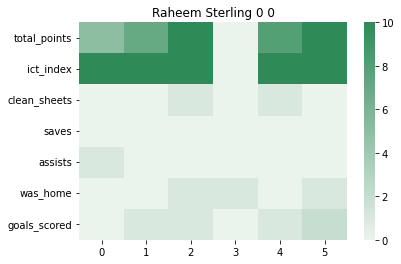

Player in Riyad Mahrez. 4.817805492040627 To double trade  = False 


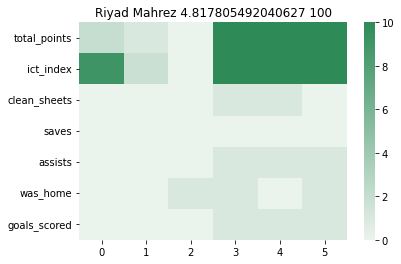

Player out John McGinn. 0 To double trade  = False 


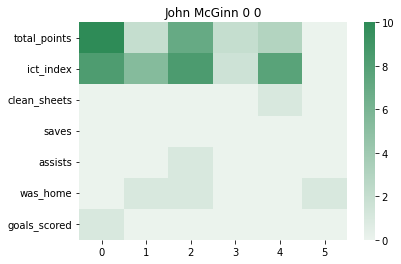

Player in James Maddison. 5.0110280117439405 To double trade  = False 


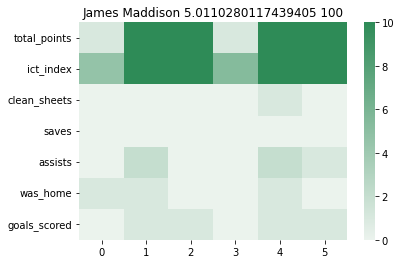

In [3]:
current_squad, non_squad = await get_current_squad(features, window=agent.window, num_players=agent.num_players)
current_squad, non_squad = await agent.get_new_squad(features)
squad = current_squad + non_squad

In [4]:

#agent.get_wildcard_squad(squad, max_weight=1000, visualize=False)

## Show game week id

In [5]:
agent.gameweek, current_squad[0]

(<coroutine object get_latest_game_week at 0x7f0eb1d193c0>,
 <player.Player at 0x7f0f94df7400>)

## Use model to swap players

## Set playing 11

In [6]:
await agent.set_playing_11(current_squad, visualize=False)

## Highlight top performers by position for this week





Goalkeeper
David de Gea


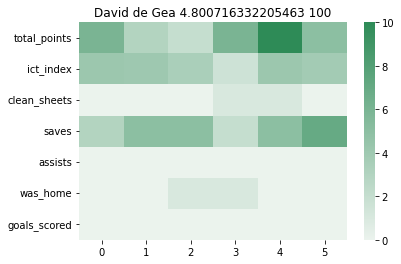

Aaron Ramsdale


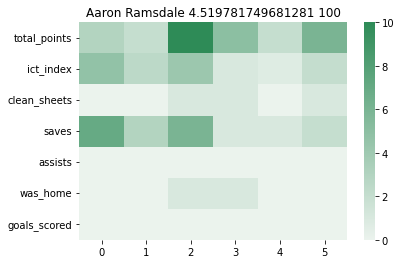

Nick Pope


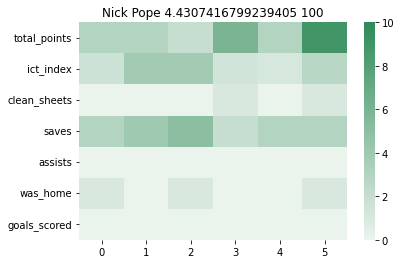

Robert Sánchez


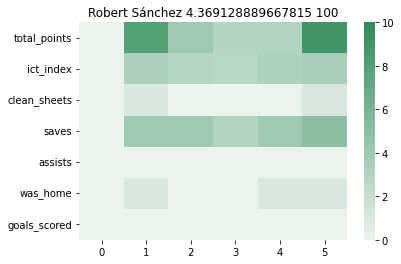

Hugo Lloris


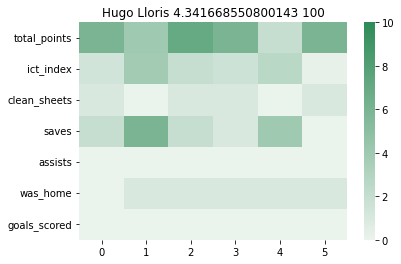










Defender
Trent Alexander-Arnold


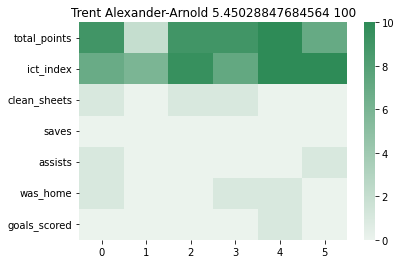

Kieran Tierney


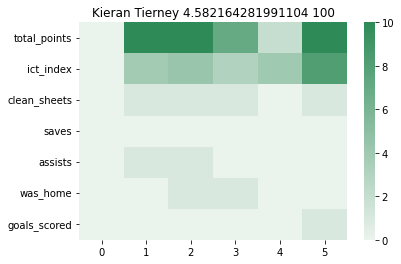

Marc Cucurella


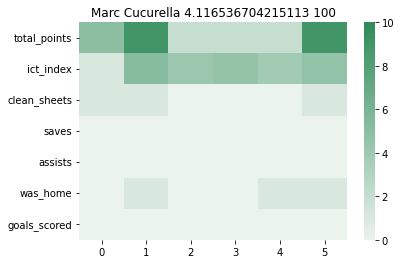

Romain Saïss


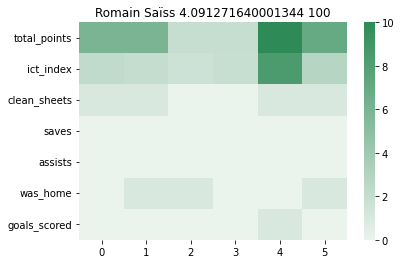

Rúben Santos Gato Alves Dias


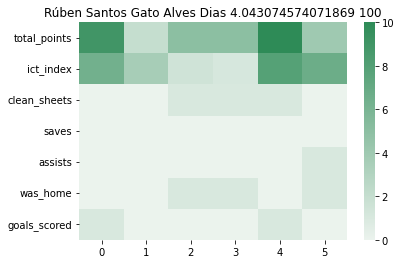










Midfielder
James Maddison


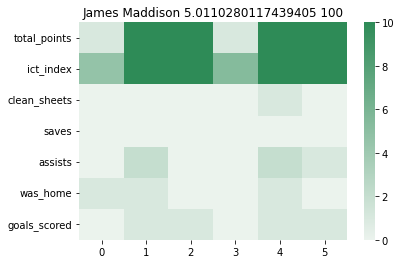

Martin Ødegaard


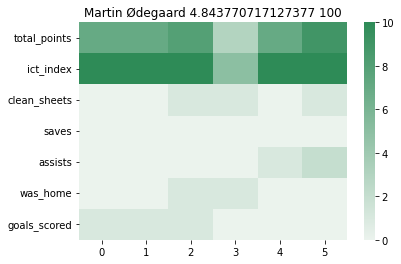

Riyad Mahrez


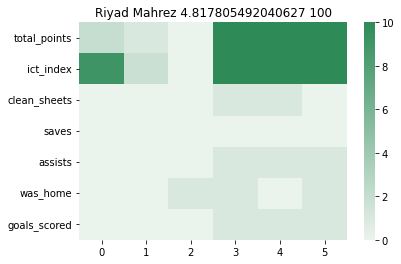

Mason Mount


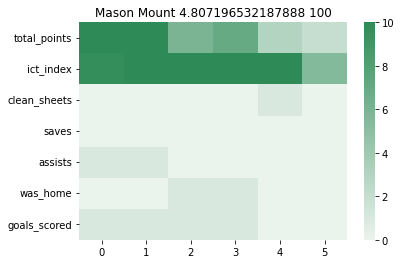

Heung-Min Son


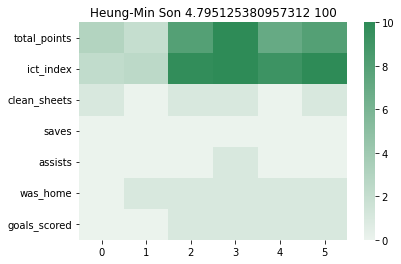










Forward
Emmanuel Dennis


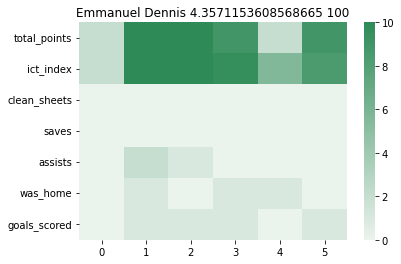

Ollie Watkins


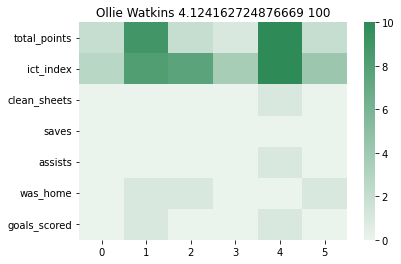

Allan Saint-Maximin


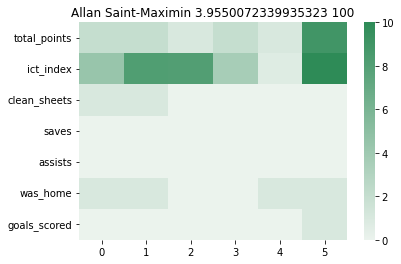

Cristiano Ronaldo dos Santos Aveiro


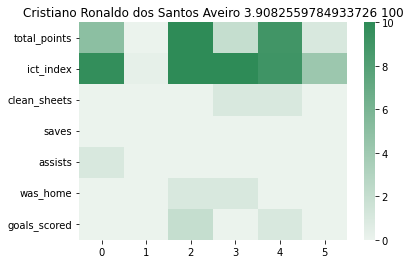

Alexandre Lacazette


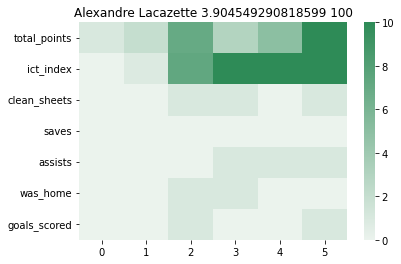

In [7]:
agent.show_top_performers(current_squad + non_squad, k=5)